# Introduction

In this Project, We are expected to calculate 

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_id=pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_test_data/test_ids_in_prediction (3).csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_train_data/train.csv')
df = data.copy()


In [ ]:
df.head()

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
0,2020-12-02T22:26:14.023Z,39918893.0,favorite,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,8511.0,Electrolux,Beyaz Eşya,Unisex,1272.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1272.0,Çamaşır Makinesi,1,425,train
2,2020-12-05T16:19:01.157Z,31292729.0,favorite,3999.00,KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi,10989.0,Vestel,Beyaz Eşya,Unisex,1276.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1276.0,Kurutma Makinesi,1,425,train
4,2020-12-02T22:26:59Z,39918893.0,visit,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,8511.0,Electrolux,Beyaz Eşya,Unisex,1272.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1272.0,Çamaşır Makinesi,1,425,train
5,2020-11-03T21:04:11Z,32593071.0,visit,266.65,Siyah Kadın Abiye Ayakkabı 01AYH158420A100,59.0,Hotiç,Branded Shoes A,Kadın,431.0,403.0,Ayakkabı,430.0,Topuklu Ayakkabı,431.0,Abiye Ayakkabı,1,425,train
6,2020-12-05T16:21:12Z,4946868.0,visit,0.00,Kadın Oval Güneş Gözlüğü OS 2589 03,1802.0,Osse,Gözlük A,Kadın,379.0,368.0,Aksesuar,2876.0,Gözlük,379.0,Güneş Gözlüğü,1,425,train


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_test_data/test.csv')
df2

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
0,2020-12-01T00:46:25Z,55075555.0,visit,89.99,Kadın Pembe Kareli Uçları Saçaklı Uzun Atkı 17...,1867.0,PIECES,Kadın A,Kadın,382.0,368.0,Aksesuar,1162.0,Atkı & Bere & Eldiven,382.0,Atkı,NaN,108,test
1,2020-12-03T19:26:19Z,32026013.0,visit,27.11,12835 Siyah Bere,33496.0,Axesoire,Diğer Aksesuarlar,Kadın,384.0,368.0,Aksesuar,1162.0,Atkı & Bere & Eldiven,384.0,Bere,NaN,108,test
2,2020-11-12T21:55:33Z,4237521.0,visit,169.90,K 909 Perfection Kırmızı Saç Düzleştirici Saç ...,11022.0,King,Kişisel Bakım Aletleri,Kadın,865.0,1071.0,Elektronik,2373.0,Kişisel Bakım Aletleri,865.0,Saç Düzleştirici,NaN,108,test
3,2020-11-02T02:07:38Z,33388105.0,visit,59.90,Pratik Isıtıcı + 1 Adet 200g Pudralı,25522.0,İnci Ağda,Kişisel Bakım,NaN,2431.0,1070.0,Kozmetik & Kişisel Bakım,2430.0,"Tıraş, Ağda ve Epilasyon",1542.0,Ağda & Tüy Dökücü,NaN,108,test
4,2020-11-19T18:07:42Z,32433838.0,visit,38.99,Atkı,842.0,Koton,Kadın A,Kadın,382.0,368.0,Aksesuar,1162.0,Atkı & Bere & Eldiven,382.0,Atkı,NaN,108,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324809,2020-12-08T22:42:09Z,39832331.0,visit,0.00,3 Katlı Telli Cerrahi Maske 1 Kutu 50 Adet Kut...,972528.0,masktak,Sağlık,NaN,4025.0,1219.0,Süpermarket,2377.0,Sağlık,4025.0,Medikal Maske,NaN,7509,test
2324810,2020-12-08T22:42:14Z,46129448.0,basket,71.10,Yumuşak Elastik Kulaklı Maske 100 Adet,33938.0,Evony,Sağlık,NaN,4025.0,1219.0,Süpermarket,2377.0,Sağlık,4025.0,Medikal Maske,NaN,7509,test
2324811,2020-12-08T22:42:16Z,46881661.0,visit,39.29,Yumuşak Elastik Kulaklı 3 Katlı Cerrahi Maske ...,33938.0,Evony,Sağlık,NaN,4025.0,1219.0,Süpermarket,2377.0,Sağlık,4025.0,Medikal Maske,NaN,7509,test
2324812,2020-12-08T22:42:07Z,43524099.0,basket,0.00,50 Adet Siyah Tek Kullanımlık Lastikli Telli 3...,961001.0,Commando,Sağlık,NaN,4025.0,1219.0,Süpermarket,2377.0,Sağlık,4025.0,Medikal Maske,NaN,7509,test


# Missin Value

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


product gender Nan'ları Unisex ile değiştirebiliriz.

In [ ]:
missing_values = missing_values_table(df)
missing_values.head(20)
print(df.shape)

Your selected dataframe has 19 columns.
There are 14 columns that have missing values.
(5493268, 19)


# Inbalanced data

In [ ]:
df['gender'] = df['gender'].replace('F', 1)
df['gender'] = df['gender'].replace('M', 0)

In [ ]:
df['gender'].value_counts()

1    4754495
0     738773
Name: gender, dtype: int64

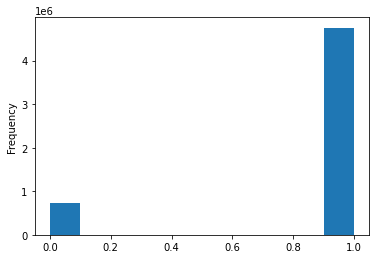

In [ ]:
df['gender'].astype(int).plot.hist() # This is an inbalanced dataset

# Unique values

In [ ]:
df['unique_id'] = df['unique_id'].astype('object')

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0) #columnların unique değerleri. Bu değerlere bakınca one hot encoding tarzı
                                                               # bir şey yapmak imkansız duruyor.

time_stamp              1422101
user_action                   5
product_name             376175
brand_name                28186
businessunit                 83
product_gender                3
Level1_Category_Name         10
Level2_Category_Name         89
Level3_Category_Name        651
unique_id                  5494
type                          1
dtype: int64

# Anomalie var mı?(Ben göremedim)

In [ ]:
df.iloc[:,0].min(), 

('2020-10-14T10:42:23Z',)

In [ ]:
df.describe()

,contentid,sellingprice,brand_id,category_id,Level1_Category_Id,Level2_Category_Id,Level3_Category_Id,gender,unique_id
count,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06,4.789628e+06
mean,3.740183e+07,2.208891e+02,1.540763e+05,1.097022e+03,7.553548e+02,1.703090e+03,1.108375e+03,8.688652e-01,1.125291e+03
std,1.682897e+07,1.090162e+03,3.344313e+05,8.165392e+02,6.086744e+02,1.096297e+03,7.462652e+02,3.375478e-01,1.327362e+03
min,4.885200e+04,0.000000e+00,9.000000e+00,3.690000e+02,3.680000e+02,3.870000e+02,3.690000e+02,0.000000e+00,1.000000e+00
25%,3.235566e+07,5.400000e+01,8.420000e+02,5.630000e+02,5.220000e+02,5.030000e+02,5.610000e+02,1.000000e+00,1.780000e+02
50%,4.163659e+07,8.999000e+01,8.605000e+03,6.040000e+02,5.220000e+02,1.209000e+03,9.710000e+02,1.000000e+00,6.110000e+02
75%,4.938068e+07,1.839500e+02,3.120000e+04,1.255000e+03,7.580000e+02,2.870000e+03,1.188000e+03,1.000000e+00,1.549000e+03
max,6.780625e+07,2.263200e+05,1.042155e+06,4.572000e+03,3.186000e+03,4.572000e+03,4.591000e+03,1.000000e+00,7.996000e+03


In [ ]:
df.iloc[df['sellingprice'].argmax()]

time_stamp                         2020-10-18T12:59:00Z
contentid                                   3.68181e+07
user_action                                      search
sellingprice                                     226320
product_name            Ahşap Ev (ahşap Bungalov) 82 m2
brand_id                                         951109
brand_name                                        MANDU
businessunit                            Bahçe Mobilyası
product_gender                                   Unisex
category_id                                        2652
Level1_Category_Id                                 2859
Level1_Category_Name                              Yaşam
Level2_Category_Id                                 2469
Level2_Category_Name               Bahçe ve Yapı Market
Level3_Category_Id                                  797
Level3_Category_Name                              Bahçe
gender                                                0
unique_id                                       

# Correlations Buradan bir şey çıkmıyor. categorical değişkenler sorun yaratıyor

In [ ]:
df.head()

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
0,2020-12-02T22:26:14.023Z,39918893.0,favorite,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,8511.0,Electrolux,Beyaz Eşya,Unisex,1272.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1272.0,Çamaşır Makinesi,1,425,train
2,2020-12-05T16:19:01.157Z,31292729.0,favorite,3999.00,KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi,10989.0,Vestel,Beyaz Eşya,Unisex,1276.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1276.0,Kurutma Makinesi,1,425,train
4,2020-12-02T22:26:59Z,39918893.0,visit,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,8511.0,Electrolux,Beyaz Eşya,Unisex,1272.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1272.0,Çamaşır Makinesi,1,425,train
5,2020-11-03T21:04:11Z,32593071.0,visit,266.65,Siyah Kadın Abiye Ayakkabı 01AYH158420A100,59.0,Hotiç,Branded Shoes A,Kadın,431.0,403.0,Ayakkabı,430.0,Topuklu Ayakkabı,431.0,Abiye Ayakkabı,1,425,train
6,2020-12-05T16:21:12Z,4946868.0,visit,0.00,Kadın Oval Güneş Gözlüğü OS 2589 03,1802.0,Osse,Gözlük A,Kadın,379.0,368.0,Aksesuar,2876.0,Gözlük,379.0,Güneş Gözlüğü,1,425,train


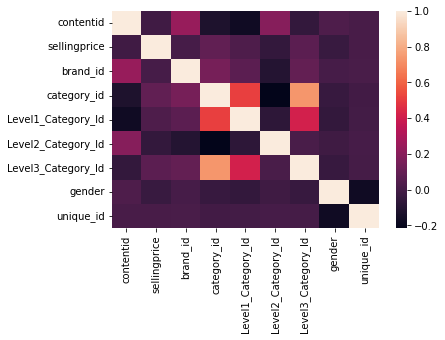

In [ ]:
sns.heatmap(df.corr())

# Encoding çalışmaları

In [ ]:
app_train = df.sample(n = 100000)
app_train.head()

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
2872238,2020-10-30T11:45:45Z,35179912.0,visit,78.00,Kadın Kırmızı Klasik Kesim Pantolon,7791.0,MISS IPEKYOL,Kadın A,Kadın,529.0,522.0,Giyim,2869.0,Alt Giyim,529.0,Pantolon,1,442,train
1596223,2020-11-06T12:49:13Z,35051440.0,visit,139.99,Mint Fitilli Kazak Pantolon Triko Alt-Üst Takı...,40.0,TRENDYOLMİLLA,PL Woman,Kadın,2160.0,522.0,Giyim,584.0,Takımlar,2160.0,Alt-Üst Takım,1,2099,train
2062771,2020-11-25T09:49:43Z,42670894.0,visit,58.99,Kadın Bej Leopar Desen Asimetrik Etek 0YZK7-10140,982012.0,XENA,Kadın B,Kadın,526.0,522.0,Giyim,2869.0,Alt Giyim,526.0,Etek,1,533,train
5035493,2020-11-27T18:34:03Z,35417062.0,visit,29.75,Kendinden Yapışkanlı Duvar Kağıdı 77*70cm 0.54 M2,948138.0,RENKLİ EVİM,Ev Dekorasyon,Unisex,841.0,758.0,Ev & Mobilya,458.0,Ev Dekorasyon,841.0,Duvar Kağıdı,0,2618,train
451647,2020-10-22T14:26:18Z,5608854.0,search,0.00,A6-S2/B66-S2 İnox Ankastre Fırın,13530.0,KUMTEL,Beyaz Eşya,Unisex,1275.0,1071.0,Elektronik,1212.0,Beyaz Eşya,1275.0,Fırın,0,12,train


In [ ]:
app_test = df2.sample(n = 100000)
app_test.head()

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
516333,2020-11-23T09:40:15Z,47124539.0,visit,149.95,Kadın Mavi Jeans,2685.0,Bershka,Kadın A,Kadın,1186.0,522.0,Giyim,2869.0,Alt Giyim,1186.0,Jeans,NaN,1920,test
2270585,2020-11-26T10:41:02Z,48228733.0,visit,137.97,Çok Renkli Misty Garden Pijama Takımı,8605.0,Penti,Ev Giyim,Kadın,563.0,522.0,Giyim,2870.0,Ev Giyim,561.0,Pijama,NaN,5121,test
1821169,2020-11-25T16:31:48Z,63075860.0,search,34.90,20 ml Kekik Yağı,951404.0,Lokman ada sultan,Cilt Bakım,Unisex,747.0,1070.0,Kozmetik & Kişisel Bakım,1203.0,Cilt Bakım,747.0,Bakım Yağları,NaN,2844,test
482763,2020-11-02T09:27:34Z,44166047.0,search,249.99,Kadın Yeşil Kapitoneli Yelek 77094379,13904.0,MANGO Woman,Kadın A,Kadın,606.0,522.0,Giyim,2867.0,Dış Giyim,1181.0,Ceket & Yelek,NaN,3360,test
1442837,2020-11-21T00:17:35.457Z,31943887.0,favorite,169.00,3 Renk 1 Set 6 Kişilik Kahve Fincan Takımı,852.0,Karaca,Sofra & Mutfak,Unisex,905.0,758.0,Ev & Mobilya,896.0,Sofra & Mutfak,516.0,Sofra,NaN,2168,test


In [ ]:
correlations = app_train.corr()['gender'].sort_values()
correlations

Level1_Category_Id   -0.052714
Level3_Category_Id   -0.040897
sellingprice         -0.038964
category_id          -0.037111
Level2_Category_Id   -0.020350
brand_id              0.007320
contentid             0.028672
gender                1.000000
Name: gender, dtype: float64

In [ ]:
print(app_train.iloc[-2].dtypes)

object


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 3:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [ ]:
app_train.head()

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
399897,2020-11-10T17:55:56Z,56893272.0,4,219.99,Beyaz Unisex Spor Ayakkabı Tb211,15214.0,Tonny Black,Branded Shoes B,2,975.0,403.0,2,420.0,Spor Ayakkabı,975.0,Sneaker,1,1302,0
3964610,2020-11-25T15:26:00Z,2695917.0,4,85.98,Boyuna Asılan Telefon Tutucu Portatif Stand,33508.0,Helen's Home,Ev Dekorasyon,2,369.0,368.0,0,2872.0,Diğer Aksesuar,369.0,Diğer Aksesuarlar,1,40,0
4489025,2020-12-03T03:36:08Z,31139495.0,4,129.90,Çalışma Masası Bilgisayar Laptop Masası 5056,22211.0,Weblonya,Ofis Mobilyası,2,2100.0,758.0,4,503.0,Mobilya,2084.0,Çalışma Odası,1,714,0
5112473,2020-10-18T19:54:03Z,40505786.0,3,71.50,Kanvas Çapraz Omuz Postacı Çantası Kahverengi,10729.0,SEVENTEEN,Çanta & Valiz,2,447.0,368.0,0,435.0,Çanta,447.0,Postacı Çantası,0,3154,0
714033,2020-11-12T10:26:25Z,35419910.0,3,24.99,Siyah %100 Pamuk Bisiklet Yaka Boyfriend Örme ...,40.0,TRENDYOLMİLLA,PL Woman,1,604.0,522.0,5,2871.0,Üst Giyim,604.0,T-Shirt,1,4148,0


In [ ]:
dff

In [ ]:
dff = df.sample(n = 100000)
dff = dff.iloc[:,1:]
dff_y = dff['gender']
dff_user_gender = dff[['sellingprice','user_action','product_gender']]
dff.drop(['sellingprice','contentid','brand_id','category_id','Level1_Category_Id','Level2_Category_Id','Level3_Category_Id','unique_id','type','gender','user_action','product_gender'], axis = 1,inplace = True)
dff

,product_name,brand_name,businessunit,Level1_Category_Name,Level2_Category_Name,Level3_Category_Name
1584195,Kadın Ekru Bisiklet Yaka Önü Nakışlı Hırka,Dilvin,Kadın B,Giyim,Üst Giyim,Kazak & Hırka
4942953,Çift Kişilik Nevresim Seti Mikerinos,For Home,Ev Tekstil,Ev & Mobilya,Ev Tekstili,Yatak Odası Tekstili
2708556,2020 Ales Tüm Adaylar Için Soru Bankası,Pegem Akademi Yayıncılık,Books,Yaşam,Kitap,"Hobi, Sanat, Akademik"
296100,Banyo Nem Topu Nem Bombası 6 Adet 85 gr,NAGARAKU,Kişisel Bakım,Kozmetik & Kişisel Bakım,Diğer Kişisel Bakım Ürünleri,Manikür & Pedikür Aletleri
3820447,Kedi Köpek Pati Yıkama Aparatı Pati Temizleme ...,Keyfi Sepet,Petshop,Süpermarket,Pet Shop,Köpek Ürünleri
...,...,...,...,...,...,...
601072,Hakiki Deri Kahve Erkek Bot & Bootie 02BOH1948...,Hotiç,Branded Shoes A,Ayakkabı,Bot & Çizme,Bot & Bootie
505097,Kadın Siyah & Beyaz Tek Cepli Çizgili V Yaka B...,XENA,Kadın B,Giyim,Üst Giyim,Bluz & Tunik
1616340,2'li Arow Metal Kaplama Cam Tuzluk,Kitchen Chef,Sofra & Mutfak,Ev & Mobilya,Sofra & Mutfak,Mutfak Saklama ve Düzenleme
2037856,Vizon Fermuar ve Cep Detaylı Yüksek Bel Spor T...,TRENDYOLMİLLA,PL Woman,Spor & Outdoor,Spor Giyim,Spor Tayt


In [ ]:
dff = pd.get_dummies(dff)

In [ ]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

0    99
1     1
Name: product_name_%100 Doğal Pamuk Çift Kişilik Nevresim Takımı Gina Antrasit, dtype: int64

In [ ]:
!pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6024 sha256=f7a94ef577fc27fe653b7e57be07d65dad68851acc6c6923e6910f8ae6eb3ce3
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca


In [ ]:
import mca

In [ ]:
mca_df = mca.MCA(dff)
mca_df.fs_r(0.5).shape

(100, 22)

In [ ]:
mca_counts = mca.MCA(counts.drop('oak_type', axis=1))

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(dff)

PCA(n_components=0.5)

In [ ]:
>>> print(pca.explained_variance_ratio_.sum())

>>> print(pca.singular_values_)


0.5040491917914991
[7.25710805 5.16667325 4.76517874 4.73404081 4.40258204 4.24692588
 3.96695014 3.51571834 3.32450333 3.16358572 3.05099047 2.97789668
 2.9483743  2.92835183 2.91267307 2.82939015 2.79970719 2.79309816]


In [ ]:
print(pca.components_.shape)
pca.components_

(18, 327)


array([[-1.41293497e-02, -1.12330372e-02, -1.19531399e-02, ...,
        -9.13231231e-03, -4.23880492e-02, -1.60608505e-02],
       [-1.86570462e-02, -1.04878568e-02, -1.68209058e-02, ...,
        -4.29808801e-03, -5.59711386e-02,  5.07644500e-02],
       [-5.05862757e-02, -2.37677579e-02,  2.27262442e-02, ...,
        -3.06980256e-03, -1.51758827e-01,  1.03705880e-02],
       ...,
       [-5.63639601e-03,  5.97346310e-03, -2.60179182e-04, ...,
         1.85694202e-02, -1.69091880e-02, -1.25734790e-02],
       [-8.39001054e-02,  9.15416411e-02, -4.34178176e-04, ...,
        -1.39937674e-01, -2.51700316e-01,  1.43084011e-04],
       [ 6.92865071e-04, -7.59944587e-04,  2.55732776e-02, ...,
        -1.14244025e-02,  2.07859521e-03,  4.78042963e-03]])

In [ ]:
pca_df = pd.DataFrame(pca.transform(dff))
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.598697,-0.209929,-0.155694,-0.082037,0.179362,1.211836,-0.164559,-0.548148,-0.009015,-0.158125,-0.084668,-0.086845,0.017540,0.023937,-0.048585,0.013005,0.003515,-0.011364
1,-0.933582,1.680815,0.295408,-0.097988,-0.146398,-0.221618,0.114327,-0.171896,0.008284,-0.068007,-0.061279,-0.078881,0.002864,-0.041228,-0.031908,0.229594,0.002916,-0.197717
2,-0.845855,1.355132,0.235484,-0.096619,-0.120025,-0.143593,0.121869,-0.087719,0.018885,0.009020,-0.084457,0.104301,0.037112,0.140155,-0.022853,-0.100656,0.001122,0.037294
3,-0.768734,1.031981,0.175309,-0.100804,-0.094738,-0.051568,0.145027,0.035604,0.041615,0.165166,-0.161186,0.579347,0.136012,0.657695,-0.008418,-1.139805,-0.003967,0.814849
4,0.294313,-0.032325,-0.190101,0.327646,0.285586,-0.030310,0.056947,0.294278,-0.854517,-0.124849,-0.462958,0.306425,-0.548273,-0.416709,-0.355664,-0.782229,0.019976,-0.628662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.560769,-0.180514,-0.128902,-0.067677,0.141260,0.927440,-0.117541,-0.318620,-0.004419,-0.060774,-0.024250,-0.018090,0.003031,0.003525,-0.006140,0.000021,-0.000172,0.000688
96,0.766007,-0.003036,0.264052,-0.626351,1.224207,-0.173744,0.716786,-0.096816,-0.013174,-0.089537,0.186626,-0.191131,0.151409,-0.041997,0.073805,-0.002256,-0.002143,0.133114
97,1.008608,0.037056,-0.000122,0.104434,-0.931132,0.169905,0.284280,-0.004277,-0.019500,0.193703,-0.472681,-0.311897,0.329312,-0.304318,0.233926,-0.013134,-0.006711,0.321313
98,-0.933582,1.680815,0.295408,-0.097988,-0.146398,-0.221618,0.114327,-0.171896,0.008284,-0.068007,-0.061279,-0.078881,0.002864,-0.041228,-0.031908,0.229594,0.002916,-0.197717


In [ ]:
df = df.iloc[:,1:]
df_y = df['gender']
df_user_gender = df[['sellingprice','user_action','product_gender']]
df.drop(['sellingprice','contentid','brand_id','category_id','Level1_Category_Id','Level2_Category_Id','Level3_Category_Id','unique_id','type','gender','user_action','product_gender'], axis = 1,inplace =x True)
df

,product_name,brand_name,businessunit,Level1_Category_Name,Level2_Category_Name,Level3_Category_Name
0,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,Electrolux,Beyaz Eşya,Elektronik,Beyaz Eşya,Çamaşır Makinesi
1,WW90J5475FW A+++ 1400 Devir 9 kg Çamaşır Makinesi,Samsung,Beyaz Eşya,Elektronik,Beyaz Eşya,Çamaşır Makinesi
2,KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi,Vestel,Beyaz Eşya,Elektronik,Beyaz Eşya,Kurutma Makinesi
3,CMI 9710 A+++ 1000 Devir 9 kg Çamaşır Makinesi,Vestel,Beyaz Eşya,Elektronik,Beyaz Eşya,Çamaşır Makinesi
4,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...,Electrolux,Beyaz Eşya,Elektronik,Beyaz Eşya,Çamaşır Makinesi
...,...,...,...,...,...,...
5493263,Turbo Profesyonel Saç Kurutma Makinesi,Powertec,Kişisel Bakım Aletleri,Elektronik,Kişisel Bakım Aletleri,Saç Kurutma Makinesi
5493264,Erkek Gri Kot Pantolon,ukdwear,Erkek B,Giyim,Alt Giyim,Jeans
5493265,Hd 6480 2200 Watt Difüzör Başlıklı İyonik Saç ...,Grundig,Kişisel Bakım Aletleri,Elektronik,Kişisel Bakım Aletleri,Saç Kurutma Makinesi
5493266,Siyah Siyah Erkek Sneaker,Riccon,Branded Shoes B,Ayakkabı,Spor Ayakkabı,Sneaker


In [ ]:
df = pd.get_dummies(df.iloc[:1000000])

# deneme

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_train_data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_test_data/test.csv')
test_id=pd.read_csv('/content/drive/MyDrive/IE582-PROJECT/IE582_Fall21_test_data/test_ids_in_prediction (3).csv')
df = data.copy()
df.dropna(inplace=True) 
df['gender'] = df['gender'].replace('F', 1)
df['gender'] = df['gender'].replace('M', 0)

In [ ]:
test_id

,unique_id
0,9
1,18
2,21
3,25
4,31
...,...
2375,7982
2376,7990
2377,7993
2378,7994


In [ ]:
df_y = df['gender']
df_user_gender = df[['sellingprice','user_action','product_gender','gender']]

"df.drop(['sellingprice','contentid','brand_id','category_id','Level1_Category_Id','Level2_Category_Id',\n          'Level3_Category_Id','unique_id','type','user_action','product_gender'], axis = 1,inplace = True)"

In [ ]:
df_user_gender = pd.get_dummies(df_user_gender)
df_user_gender

,sellingprice,gender,user_action_basket,user_action_favorite,user_action_order,user_action_search,user_action_visit,product_gender_Erkek,product_gender_Kadın,product_gender_Unisex
0,3099.00,1,0,1,0,0,0,0,0,1
2,3999.00,1,0,1,0,0,0,0,0,1
4,3099.00,1,0,0,0,0,1,0,0,1
5,266.65,1,0,0,0,0,1,0,1,0
6,0.00,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5493263,89.50,0,0,0,0,1,0,0,0,1
5493264,99.99,0,0,0,0,1,0,1,0,0
5493265,169.00,0,0,0,0,1,0,0,0,1
5493266,248.48,0,0,1,0,0,0,1,0,0


In [ ]:
m =df_user_gender.copy()

m_y = m['gender']
m_x = m.drop(['gender'],axis= 1)
m_x

,sellingprice,user_action_basket,user_action_favorite,user_action_order,user_action_search,user_action_visit,product_gender_Erkek,product_gender_Kadın,product_gender_Unisex
0,3099.00,0,1,0,0,0,0,0,1
2,3999.00,0,1,0,0,0,0,0,1
4,3099.00,0,0,0,0,1,0,0,1
5,266.65,0,0,0,0,1,0,1,0
6,0.00,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
5493263,89.50,0,0,0,1,0,0,0,1
5493264,99.99,0,0,0,1,0,1,0,0
5493265,169.00,0,0,0,1,0,0,0,1
5493266,248.48,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m_x, m_y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,class_weight = 'balanced')
classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
#49134 107286 23458 1017529

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

#roc_auc_score(y_test, clf.decision_function(X_test))

In [ ]:
y_pred = (classifier.predict_proba(X_test)[:,1] >= 0.868).astype(bool)

In [ ]:
y_pred.mean()

In [ ]:
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_l = clf.predict(X_test)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred_l)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_pred.mean()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


In [ ]:
f_test = test.iloc[test_id.iloc[:,0]]

In [ ]:
missing_values = missing_values_table(f_test)
missing_values.head(20)

Your selected dataframe has 19 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
gender,2380,100.0
product_gender,145,6.1
sellingprice,48,2.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(m_x)
m_x = scaler.transform(m_x)
#test = scaler.transform(test)

In [ ]:
m_x

array([[1.36930011e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.76696713e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.36930011e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.46730293e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.09791446e-03, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.09791446e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Light GBM

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m_x, m_y, test_size = 0.25, random_state = 0)

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='auc')

[20]	training's binary_logloss: 0.324503	training's auc: 0.773344	valid_0's binary_logloss: 0.323441	valid_0's auc: 0.77249
[40]	training's binary_logloss: 0.322382	training's auc: 0.775518	valid_0's binary_logloss: 0.321417	valid_0's auc: 0.774423
[60]	training's binary_logloss: 0.321916	training's auc: 0.776883	valid_0's binary_logloss: 0.321007	valid_0's auc: 0.775673
[80]	training's binary_logloss: 0.321639	training's auc: 0.777638	valid_0's binary_logloss: 0.320761	valid_0's auc: 0.77638
[100]	training's binary_logloss: 0.321402	training's auc: 0.7782	valid_0's binary_logloss: 0.320557	valid_0's auc: 0.776901


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8771
Testing accuracy 0.8776


In [ ]:
#y_pred = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
#0.7769010110414196

0.7769010110414196

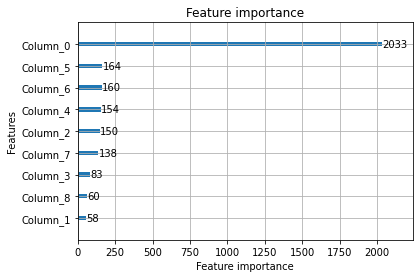

In [ ]:
lgb.plot_importance(model)

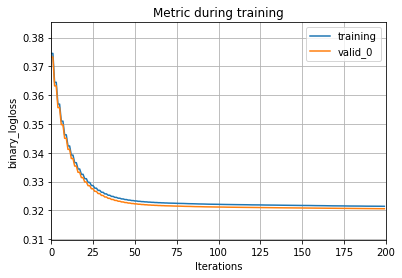

In [ ]:
lgb.plot_metric(model)

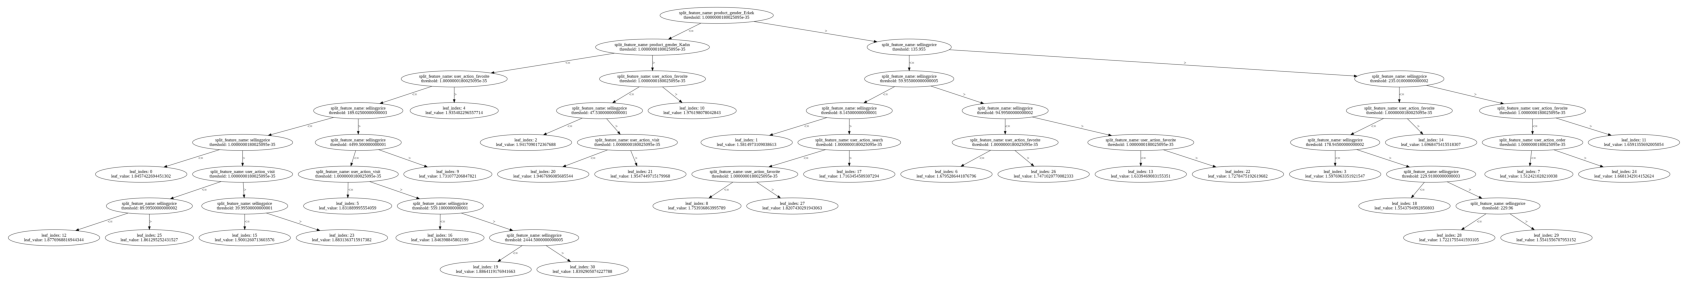

In [ ]:
lgb.plot_tree(model,figsize=(30,40))

In [ ]:
print(metrics.classification_report(y_test,model.predict(X_test))) # first version

              precision    recall  f1-score   support

           0       0.58      0.22      0.32    156420
           1       0.89      0.98      0.93   1040987

    accuracy                           0.88   1197407
   macro avg       0.74      0.60      0.63   1197407
weighted avg       0.85      0.88      0.85   1197407



In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
y_pred.shape

(1197407,)

In [ ]:
unique = test['unique_id']
unique

0           108
1           108
2           108
3           108
4           108
           ... 
2324809    7509
2324810    7509
2324811    7509
2324812    7509
2324813    7509
Name: unique_id, Length: 2324814, dtype: int64

In [ ]:

pd.set_option('display.max_columns', None)

In [ ]:
test_df_user_gender = test[['sellingprice','user_action','product_gender']]

test_df_user_gender = pd.get_dummies(test_df_user_gender)

In [ ]:
y_pred2 = model.predict_proba(test_df_user_gender)[:,1]
dff = pd.DataFrame(unique)
dff['prediction'] = y_pred2
last = dff.groupby('unique_id').mean()
last

array([0.95464087, 0.92971593, 0.94825647, ..., 0.87326169, 0.82390492,
       0.82622846])

In [ ]:
np.savetxt("cikti3.txt", last['prediction'],fmt='%.2f',delimiter=',',newline=',')

## LightGBM 2

In [ ]:
unique = test['unique_id']
unique

0           108
1           108
2           108
3           108
4           108
           ... 
2324809    7509
2324810    7509
2324811    7509
2324812    7509
2324813    7509
Name: unique_id, Length: 2324814, dtype: int64

In [ ]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
model.fit(X_train,y_train, eval_metric = 'auc',
                  eval_set=[(X_test,y_test),(X_train,y_train)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 50, verbose = 200)

Training until validation scores don't improve for 50 rounds.
[200]	train's binary_logloss: 0.561658	train's auc: 0.778667	valid's binary_logloss: 0.55463	valid's auc: 0.777429
[400]	train's binary_logloss: 0.56013	train's auc: 0.7802	valid's binary_logloss: 0.55323	valid's auc: 0.778801
[600]	train's binary_logloss: 0.559169	train's auc: 0.781184	valid's binary_logloss: 0.552421	valid's auc: 0.779646
[800]	train's binary_logloss: 0.558579	train's auc: 0.781759	valid's binary_logloss: 0.551937	valid's auc: 0.780099
[1000]	train's binary_logloss: 0.558069	train's auc: 0.78226	valid's binary_logloss: 0.551526	valid's auc: 0.7805
[1200]	train's binary_logloss: 0.557689	train's auc: 0.782616	valid's binary_logloss: 0.551231	valid's auc: 0.780774
[1400]	train's binary_logloss: 0.557418	train's auc: 0.782847	valid's binary_logloss: 0.551015	valid's auc: 0.780932
[1600]	train's binary_logloss: 0.557193	train's auc: 0.78305	valid's binary_logloss: 0.550835	valid's auc: 0.781058
[1800]	train's 

LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [ ]:
y_pred2 = model.predict_proba(test_df_user_gender)[:,1]


In [ ]:
y_pred2

array([0.50511639, 0.50511639, 0.50511639, ..., 0.23370492, 0.42474393,
       0.41821752])

In [ ]:
dff = pd.DataFrame(unique)
dff['prediction'] = y_pred2
last = dff.groupby('unique_id').mean()
last

,prediction
unique_id,
9,0.448626
18,0.447347
21,0.455421
25,0.426088
31,0.383026
...,...
7982,0.423181
7990,0.132024
7993,0.419750


In [ ]:
last.sort_values(by='unique_id')

,prediction
unique_id,
9,0.448626
18,0.447347
21,0.455421
25,0.426088
31,0.383026
...,...
7982,0.423181
7990,0.132024
7993,0.419750


In [ ]:
y_pred2.mean()

0.4053821871058496

In [ ]:
y_pred2

array([0.50511639, 0.50511639, 0.50511639, ..., 0.23370492, 0.42474393,
       0.41821752])

In [ ]:
np.savetxt("cikti4.txt", last['prediction'],fmt='%.2f',delimiter=',',newline=',')